# Ajuste lineal (Linear fit)

In [1]:
#%load_ext watermark
%reload_ext watermark

%watermark -v -d -a "David Torres Pascual" -p numpy,pandas,matplotlib

David Torres Pascual 2016-10-13 

CPython 3.5.2
IPython 4.2.0

numpy 1.11.1
pandas 0.18.1
matplotlib 1.5.1


In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline

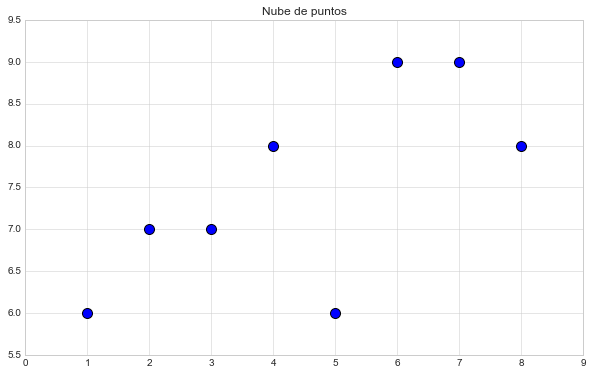

In [3]:
xs = np.array([1,2,3,4,5,6,7,8], dtype=np.float64)
ys = np.array([6,7,7,8,6,9,9,8], dtype=np.float64)

plt.figure(figsize=(10,6))
plt.scatter(xs,ys,c='b',s=100)
plt.title('Nube de puntos')
plt.show()

## Pendiente, intercepto y línea de regresión

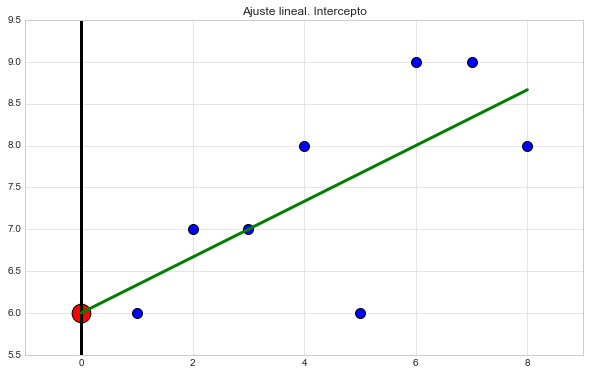

In [4]:
def pendiente_intercepto(x, y):
    
    m = (np.mean(xs)*np.mean(ys)-np.mean(xs*ys)) / ((np.mean(xs))**2-np.mean(xs**2))   
    b = np.mean(ys) - m*np.mean(xs)
    
    return m , b


m, b = pendiente_intercepto(xs,ys)


linea_regresion = [ b ]
for x in xs:
    linea_regresion.append(m*x+b)

ysPred = linea_regresion[1:len(linea_regresion)]


plt.figure(figsize=(10,6))
plt.scatter(xs,ys,c='b',s=100)
plt.axvline(0,c='k',linewidth=3)
plt.plot(linea_regresion,c='g',linewidth=3)
plt.scatter(0,linea_regresion[0],c='r',s=350)
plt.title('Ajuste lineal. Intercepto')
plt.show()

## Error cuadrático y $r^{2}$

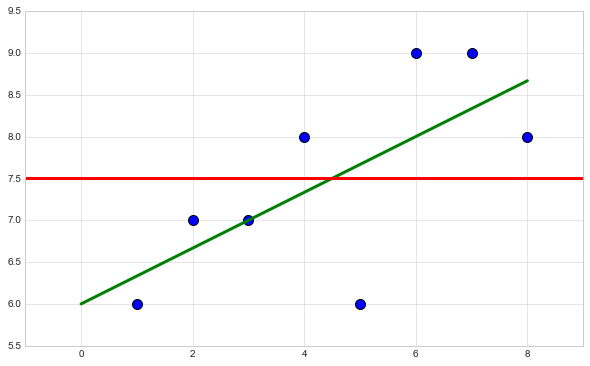

In [5]:
def error_cuadratico(ys, ysPred):
    return np.sum((ys - ysPred)**2) 

def errores_cuadraticos_ind(ys, ysPred):
    return (ys - ysPred)**2
    

def r2(ys, ysPred):
    
    media_ys = [np.mean(ys) for y in ys]   
    ecmPred = error_cuadratico(ys, ysPred)
    ecmy = error_cuadratico(ys, media_ys)
    
    return 1 - (ecmPred/ecmy)


plt.figure(figsize=(10,6))
plt.scatter(xs,ys,c='b',s=100)
plt.plot(linea_regresion,c='g',linewidth=3)
plt.axhline(np.mean(ys),c='r',linewidth=3)
plt.show()

In [6]:
import pandas as pd

df = pd.DataFrame()
df['Y'] = ys
df['YPred'] = ysPred
df['err'] = errores_cuadraticos_ind(ys, ysPred)
df.round(2)

,Y,YPred,err
0,6.0,6.33,0.11
1,7.0,6.67,0.11
2,7.0,7.00,0.00
3,8.0,7.33,0.44
4,6.0,7.67,2.78
5,9.0,8.00,1.00
6,9.0,8.33,0.44
7,8.0,8.67,0.44


In [7]:
print('Intercepto: ', b)
print('ECM: ', error_cuadratico(ys, ysPred))
print('R2: ', r2(ys, ysPred))

Intercepto:  6.0
ECM:  5.33333333333
R2:  0.466666666667
